In [1]:
# imports
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
# plt.style.use('dark_background')
from qiskit_ibm_runtime import QiskitRuntimeService

In [2]:

pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


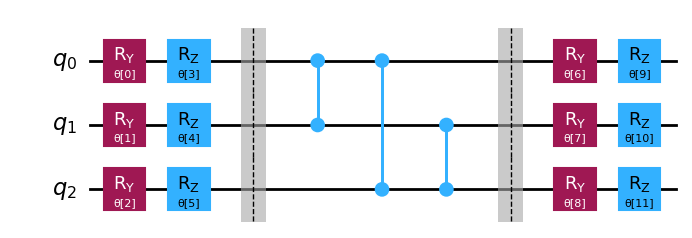

In [4]:
num_qubits = 3
rotation_blocks = ['ry','rz']
entanglement_blocks = 'cz'
entanglement = 'full'

ansatz_1 = TwoLocal(num_qubits, rotation_blocks, entanglement_blocks,entanglement,reps=1,insert_barriers=True)
ansatz_1.decompose().draw('mpl')

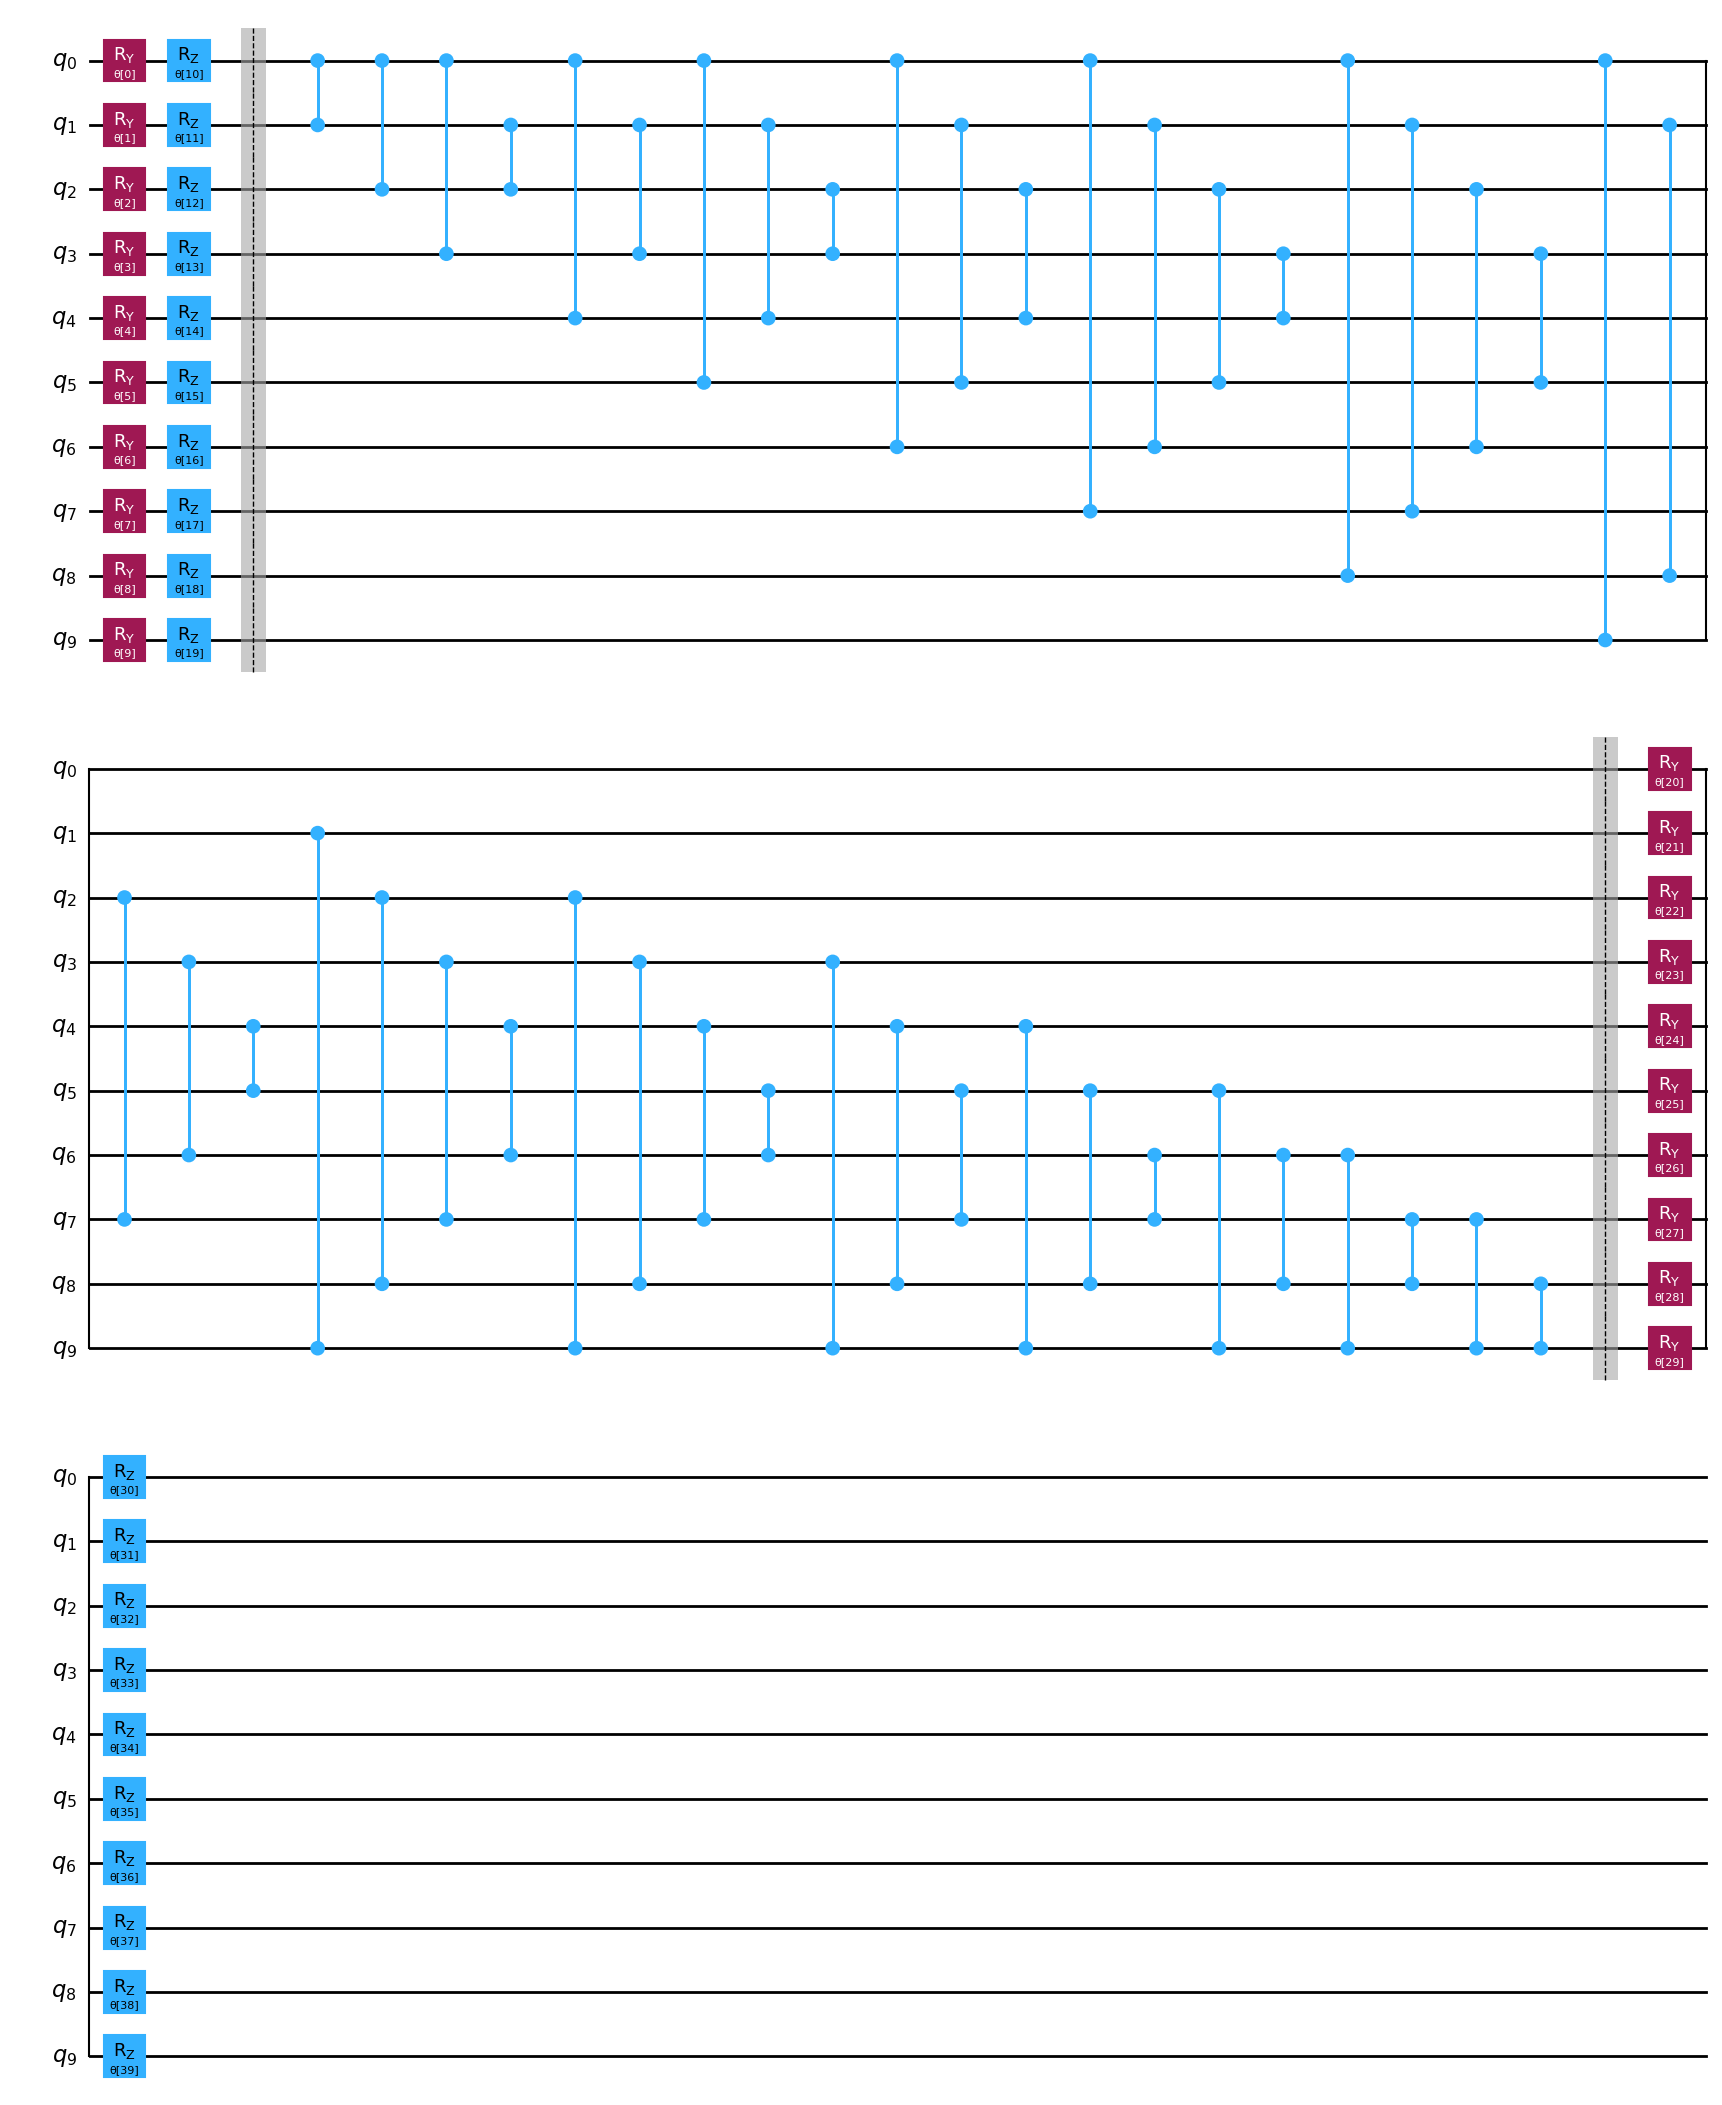

In [5]:
num_qubits = 10
ansatz_2 = TwoLocal(num_qubits, rotation_blocks, entanglement_blocks,entanglement,reps=1,insert_barriers=True)
ansatz_2.decompose().draw('mpl')

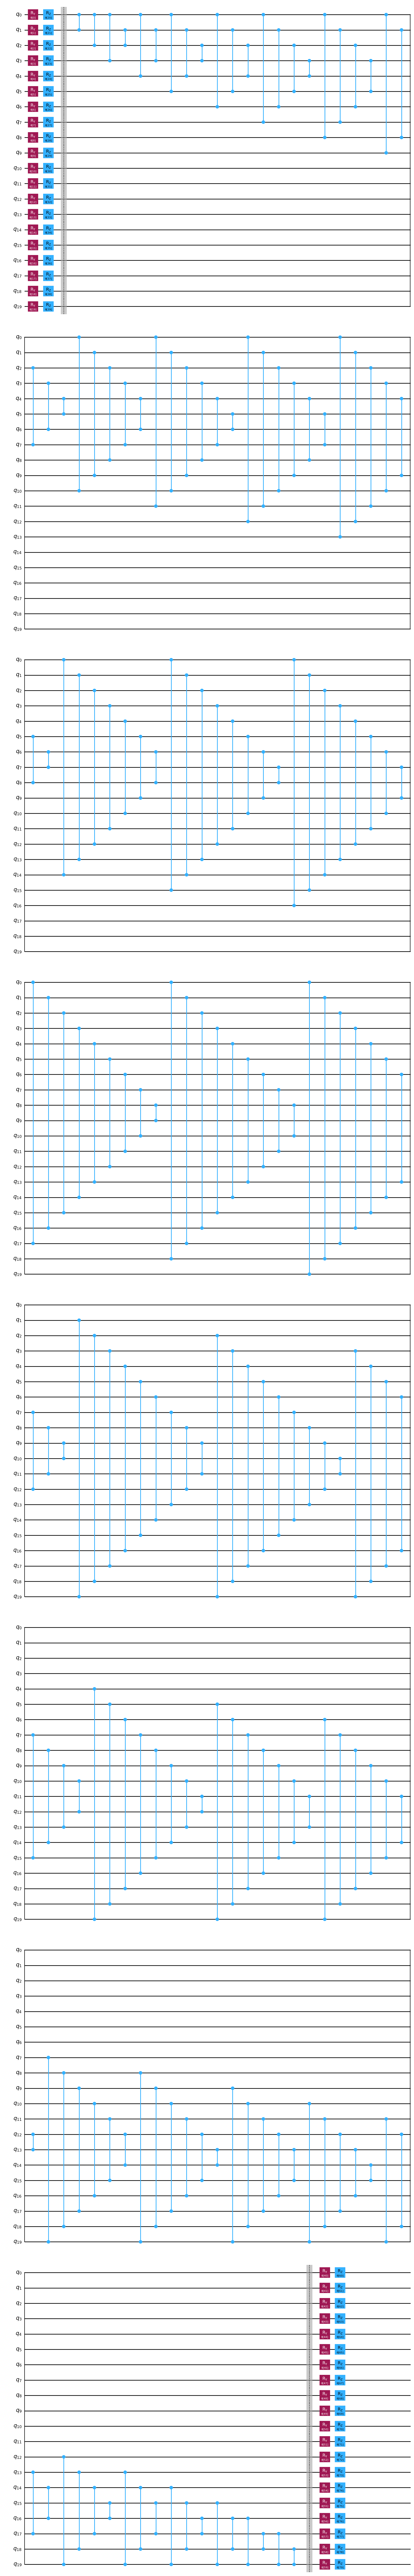

In [6]:
num_qubits = 20
ansatz_3 = TwoLocal(num_qubits, rotation_blocks, entanglement_blocks,entanglement,reps=1,insert_barriers=True)
ansatz_3.decompose().draw('mpl')

In [7]:
num_qubits = 50
ansatz_4 = TwoLocal(num_qubits, rotation_blocks, entanglement_blocks,entanglement,reps=1,insert_barriers=True)
ansatz_4.decompose().draw('mpl')

ValueError: Image size of 2228x213158 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2228.98x213158 with 1 Axes>

In [9]:
num_qubits = 100
ansatz_5 = TwoLocal(num_qubits, rotation_blocks, entanglement_blocks,entanglement,reps=1,insert_barriers=True)
# ansatz_5.decompose().draw('mpl')

In [11]:
ansatz_1.decompose().count_ops()

OrderedDict([('ry', 6), ('rz', 6), ('cz', 3), ('barrier', 2)])

In [14]:
print(f'ansatz_1  no of qubits 3: {ansatz_1.decompose().count_ops()}')
print(f'ansatz_2  no of qubits 10: {ansatz_2.decompose().count_ops()}')
print(f'ansatz_3  no of qubits 20: {ansatz_3.decompose().count_ops()}')
print(f'ansatz_4  no of qubits 50: {ansatz_4.decompose().count_ops()}')
print(f'ansatz_5  no of qubits 100: {ansatz_5.decompose().count_ops()}')


ansatz_1  no of qubits 3: OrderedDict([('ry', 6), ('rz', 6), ('cz', 3), ('barrier', 2)])
ansatz_2  no of qubits 10: OrderedDict([('cz', 45), ('ry', 20), ('rz', 20), ('barrier', 2)])
ansatz_3  no of qubits 20: OrderedDict([('cz', 190), ('ry', 40), ('rz', 40), ('barrier', 2)])
ansatz_4  no of qubits 50: OrderedDict([('cz', 1225), ('ry', 100), ('rz', 100), ('barrier', 2)])
ansatz_5  no of qubits 100: OrderedDict([('cz', 4950), ('ry', 200), ('rz', 200), ('barrier', 2)])


In [ ]:
# conclusoin : the no of cz gate does grow exponentiallly: 

